# **Advanced SQL: Time Series Analysis**

### **Data Preprocessing before analysis**

Before import this dataset (superstore.csv) to MySQL, we need to do data preprocessing. 
1. Convert Order Data and Ship Date using date format: ```%Y-%m-%d %H:%M:%S```
2. Rename columns name. In SQL we can't have column name with space. So we need convert it with underscore.

After these data processing, we save this file with new name.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('superstore.csv')
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [3]:
#Converting string to datetime and changing to desired format
df['Order Date'] = pd.to_datetime(df['Order Date'], 
                                  dayfirst=True).dt.strftime('%Y-%m-%d %H:%M:%S')

In [4]:
#Converting string to datetime and changing to desired format
df['Ship Date'] = pd.to_datetime(df['Ship Date'], 
                                  dayfirst=True).dt.strftime('%Y-%m-%d %H:%M:%S')

In [5]:
# Rename columns
df.columns = ['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit']

In [6]:
df.head(3)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08 00:00:00,2016-11-11 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08 00:00:00,2016-11-11 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,2016-06-12 00:00:00,2016-06-16 00:00:00,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [7]:
# save your new csv file
df.to_csv('new superstore.csv', index=False)
df.head(5)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08 00:00:00,2016-11-11 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08 00:00:00,2016-11-11 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12 00:00:00,2016-06-16 00:00:00,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11 00:00:00,2015-10-18 00:00:00,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11 00:00:00,2015-10-18 00:00:00,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


<hr>

## **Python MySQL Connector**

### **Using ```mysql.connector``` to Access SQL Server**

MySQL Connector/Python enables Python programs to access MySQL databases

### Import Libraries

In [8]:
import mysql.connector
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 200

#### Create Connection

In [9]:
mydb = mysql.connector.connect(
    host = 'localhost',
    user = 'root',
    passwd = 'yourpasscode',
    database = 'superstore'
)

#### Create a function to write SQL Query and display the result as DataFrame

In [10]:
mycursor = mydb.cursor()

# create function
def sql(yourQuery):
    mycursor.execute(yourQuery)
    myresult = mycursor.fetchall()
    df = pd.DataFrame(myresult, columns = mycursor.column_names)
    return df

In [11]:
# trying function
sql(
    '''
    SELECT *
    FROM superstore
    LIMIT 5;
    '''
)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [12]:
sql(
    '''
    EXPLAIN ANALYZE
    SELECT *
    FROM superstore;
    '''
)

,EXPLAIN
0,-> Table scan on superstore (cost=829.73 rows=7722) (actual time=0.029..9.654 rows=7762 loops=1)\n


## Commonly Used Functions for Time Series Analysis
### 1. Lead

SQL Server LEAD() is a window function that provides access to a row at a specified physical offset which follows the current row. For example, by using the LEAD() function, from the current row, you can access data of the next row, or the row after the next row, and so on. The LEAD() function can be very useful for comparing the value of the current row with the value of the following row.

In [13]:
sql(
    '''
    SELECT 
        order_id, order_date, segment, state, sales,
        LEAD(sales) OVER (PARTITION BY segment ORDER BY order_id) sales_lead
    FROM superstore
    WHERE order_date BETWEEN (SELECT MIN(order_date) FROM superstore) AND 
                            (SELECT MAX(order_date) FROM superstore);
    '''
).head(10)

,order_id,order_date,segment,state,sales,sales_lead
0,CA-2014-100006,2014-09-07,Consumer,New York,377.970,2.688
1,CA-2014-100678,2014-04-18,Consumer,Texas,2.688,317.058
2,CA-2014-100678,2014-04-18,Consumer,Texas,317.058,149.352
3,CA-2014-100678,2014-04-18,Consumer,Texas,149.352,227.976
4,CA-2014-100678,2014-04-18,Consumer,Texas,227.976,8.560
5,CA-2014-100895,2014-06-02,Consumer,Georgia,8.560,239.970
6,CA-2014-100895,2014-06-02,Consumer,Georgia,239.970,356.940
7,CA-2014-100895,2014-06-02,Consumer,Georgia,356.940,2.394
8,CA-2014-101147,2014-12-02,Consumer,Illinois,2.394,13.360
9,CA-2014-101266,2014-08-27,Consumer,Virginia,13.360,59.920


### 2. Lag

SQL LAG() is a window function that provides access to a row at a specified physical offset which comes before the current row. In other words, by using the LAG() function, from the current row, you can access data of the previous row, or from the second row before the current row, or from the third row before current row, and so on. The LAG() function can be very useful for calculating the difference between the current row and the previous row.

In [14]:
sql(
    '''
    SELECT 
        order_id, order_date, segment, state, sales,
        LAG(sales) OVER (PARTITION BY segment ORDER BY order_id) sales_lag
    FROM superstore
    WHERE order_date BETWEEN (SELECT MIN(order_date) FROM superstore) AND 
                            (SELECT MAX(order_date) FROM superstore);
    '''
).head(10)

,order_id,order_date,segment,state,sales,sales_lag
0,CA-2014-100006,2014-09-07,Consumer,New York,377.970,NaN
1,CA-2014-100678,2014-04-18,Consumer,Texas,2.688,377.970
2,CA-2014-100678,2014-04-18,Consumer,Texas,317.058,2.688
3,CA-2014-100678,2014-04-18,Consumer,Texas,149.352,317.058
4,CA-2014-100678,2014-04-18,Consumer,Texas,227.976,149.352
5,CA-2014-100895,2014-06-02,Consumer,Georgia,8.560,227.976
6,CA-2014-100895,2014-06-02,Consumer,Georgia,239.970,8.560
7,CA-2014-100895,2014-06-02,Consumer,Georgia,356.940,239.970
8,CA-2014-101147,2014-12-02,Consumer,Illinois,2.394,356.940
9,CA-2014-101266,2014-08-27,Consumer,Virginia,13.360,2.394


### 3. Rank

The RANK() function is a window function that assigns a rank to each row within a partition of a result set. The rows within a partition that have the same values will receive the same rank. The rank of the first row within a partition is one. The RANK() function adds the number of tied rows to the tied rank to calculate the rank of the next row, therefore, the ranks may not be consecutive.

In [15]:
sql(
    '''
    SELECT 
        order_id, order_date, segment, state, sales,
        RANK() OVER (PARTITION BY segment ORDER BY sales DESC) sales_rank
    FROM superstore
    WHERE order_date BETWEEN (SELECT MIN(order_date) FROM superstore) AND 
                            (SELECT MAX(order_date) FROM superstore);
    '''
)

,order_id,order_date,segment,state,sales,sales_rank
0,CA-2017-166709,2017-11-17,Consumer,Delaware,10499.970,1
1,CA-2014-116904,2014-09-23,Consumer,Minnesota,9449.950,2
2,CA-2016-143714,2016-05-23,Consumer,Pennsylvania,8399.976,3
3,CA-2014-143917,2014-07-25,Consumer,California,8187.650,4
4,CA-2014-139892,2014-09-08,Consumer,Texas,8159.952,5
...,...,...,...,...,...,...
7757,CA-2017-166933,2017-04-24,Home Office,California,1.810,1386
7758,CA-2016-158568,2016-08-29,Home Office,Illinois,1.788,1387
7759,CA-2017-117702,2017-11-28,Home Office,Maryland,1.640,1388
7760,CA-2016-114748,2016-10-09,Home Office,Arizona,1.408,1389


### 4. Percent Rank

The PERCENT_RANK() is a window function that calculates the percentile ranking of rows in a result set. The PERCENT_RANK() function returns a percentile ranking number which ranges from zero to one.

For a specific row, PERCENT_RANK() uses the following formula to calculate the percentile rank:

``` (rank - 1) / (total_rows - 1)```

Based on this formula, the PERCENT_RANK() function always returns zero for the first row the result set.

In [16]:
sql(
    '''
    SELECT 
        order_id, order_date, segment, region, sales,
        PERCENT_RANK() OVER (PARTITION BY region ORDER BY sales DESC) sales_rank
    FROM superstore
    WHERE order_date BETWEEN (SELECT MIN(order_date) FROM superstore) AND 
                            (SELECT MAX(order_date) FROM superstore);
    '''
)

,order_id,order_date,segment,region,sales,sales_rank
0,CA-2016-118689,2016-10-02,Corporate,Central,17499.950,0.000000
1,CA-2014-116904,2014-09-23,Consumer,Central,9449.950,0.000565
2,CA-2014-139892,2014-09-08,Consumer,Central,8159.952,0.001130
3,CA-2017-138289,2017-01-16,Consumer,Central,5443.960,0.001695
4,US-2017-167402,2017-01-13,Corporate,Central,4164.050,0.002260
...,...,...,...,...,...,...
7757,CA-2014-143168,2014-10-18,Consumer,West,1.344,0.998411
7758,US-2017-162068,2017-12-28,Corporate,West,1.188,0.998808
7759,CA-2015-106978,2015-09-28,Consumer,West,1.080,0.999205
7760,US-2017-100209,2017-07-09,Consumer,West,1.080,0.999205


<hr>

## **Time Series Analysis**

### 1. Commont Table Expression (CTE)

A Common Table Expression, also called as CTE in short form.  A CTE allows you to define a temporary named result set that available temporarily in the execution scope of a statement such as SELECT, INSERT, UPDATE, DELETE, or MERGE. The CTE can also be used in a View.

#### a) Average Monthly Sales using ```DATE_FORMAT Function```

In [17]:
sql(
    '''
    WITH monthly_avg_sales AS
    (SELECT 
        date_format(order_date, '%Y-%m-01') order_month,
        avg(sales) avg_sales
    FROM 
        superstore
    GROUP BY 
        order_month
    )
    SELECT order_month, avg_sales
    FROM monthly_avg_sales
    ORDER BY order_month;
    '''
).head(10)

,order_month,avg_sales
0,2014-01-01,207.411866
1,2014-02-01,118.106880
2,2014-03-01,416.837398
3,2014-04-01,207.388121
4,2014-05-01,179.598856
5,2014-06-01,265.033944
6,2014-07-01,267.006863
7,2014-08-01,191.157127
8,2014-09-01,326.476203
9,2014-10-01,223.852375


#### b) Average Monthly Sales using ```EXTRACT Function```

In [18]:
sql(
    '''
    WITH monthly_avg_sales AS
        (SELECT
            EXTRACT(YEAR_MONTH FROM order_date) order_month,
            avg(sales) avg_sales
        FROM 
            superstore
        GROUP BY
            order_month
        )
    SELECT order_month, avg_sales
    FROM monthly_avg_sales
    ORDER BY order_month;
    '''
).head(10)

,order_month,avg_sales
0,201401,207.411866
1,201402,118.106880
2,201403,416.837398
3,201404,207.388121
4,201405,179.598856
5,201406,265.033944
6,201407,267.006863
7,201408,191.157127
8,201409,326.476203
9,201410,223.852375


#### c) Average Daily Sales during 2014 - 2017

In [19]:
sql(
    '''
    WITH daily_avg_sales AS
        (SELECT
            date_format(order_date, '%Y-%m-%d') order_day,
            avg(sales) avg_sales
        FROM 
            superstore
        GROUP BY
            order_day
        )
    SELECT order_day, avg_sales
    FROM daily_avg_sales
    ORDER BY order_day;
    '''
)

,order_day,avg_sales
0,2014-01-04,96.020000
1,2014-01-05,19.536000
2,2014-01-06,489.677778
3,2014-01-07,43.579000
4,2014-01-09,20.272000
...,...,...
1168,2017-12-26,376.906000
1169,2017-12-27,88.818000
1170,2017-12-28,90.283576
1171,2017-12-29,242.961167


#### d) Average Sales from 1st - 31 every month

In [20]:
sql(
    '''
    WITH daily_avg_sales AS
        (SELECT
            DAY(order_date) order_day,
            avg(sales) avg_sales
        FROM 
            superstore
        GROUP BY
            order_day
        )
    SELECT order_day, avg_sales
    FROM daily_avg_sales
    ORDER BY order_day;
    '''
)

,order_day,avg_sales
0,1,279.941948
1,2,260.668052
2,3,206.371417
3,4,237.230371
4,5,191.716342
5,6,173.455605
6,7,236.312147
7,8,282.098422
8,9,208.250394
9,10,205.575858


### 2.	Calculating Aggregates Over Windows Function

In SQL, a window function or analytic function is a function which uses values from one or multiple rows to return a value for each row. (This contrasts with an aggregate function, which returns a single value for multiple rows.) Window functions have an OVER clause; any function without an OVER clause is not a window function, but rather an aggregate or single-row (scalar) function.

Window functions operate on a set of rows and return a single aggregated value for each row. The term Window describes the set of rows in the database on which the function will operate. We define the Window (set of rows on which functions operates) using an OVER() clause.

**Types of Window functions**
1. Aggregate Window Functions<br>
SUM(), MAX(), MIN(), AVG(). COUNT()

2. Ranking Window Functions<br>
RANK(), DENSE_RANK(), ROW_NUMBER(), NTILE()

3. Value Window Functions<br>
LAG(), LEAD(), FIRST_VALUE(), LAST_VALUE()

#### Average Daily Profit using ```Aggregate Window Function```

In [21]:
sql(
    '''
    SELECT  order_id, 
            date_format(order_date, '%Y-%m-%d') order_date, 
            category,
            Avg(profit) OVER (PARTITION BY Order_Date) daily_avg_profit
    FROM superstore
    WHERE order_date BETWEEN (SELECT MIN(order_date) FROM superstore) AND 
                            (SELECT MAX(order_date) FROM superstore)
    GROUP BY order_date;
    '''
)

,order_id,order_date,category,daily_avg_profit
0,CA-2014-112326,2014-01-04,Office Supplies,4.2717
1,CA-2014-141817,2014-01-05,Office Supplies,4.8840
2,CA-2014-130813,2014-01-06,Office Supplies,9.3312
3,CA-2014-105417,2014-01-07,Furniture,-53.7096
4,CA-2014-135405,2014-01-09,Office Supplies,1.1680
...,...,...,...,...
1168,CA-2017-112487,2017-12-26,Office Supplies,-2.6100
1169,CA-2017-134404,2017-12-27,Technology,-35.6174
1170,CA-2017-163979,2017-12-28,Office Supplies,210.4936
1171,CA-2017-118885,2017-12-29,Furniture,-44.2764


### 3.	Previous Day Comparison

How to compare agregate value in day by day? In this query sample, we compare average daily discount and sales with previous one using CTE.

#### Comparing Average Discount with Previous Day

In [23]:
sql(
    '''
    WITH daily_avg_discount AS 
        (SELECT DATE_FORMAT(order_date, '%Y-%m-%d') order_day,
                avg(discount) avg_discount
        FROM superstore
        GROUP BY order_day
        )
    SELECT order_day, avg_discount,
            (SELECT avg_discount
            FROM daily_avg_discount data2
            WHERE date(data2.order_day) = date(data1.order_day) - 1) avg_discount_previous_day
    FROM
        daily_avg_discount data1
    ORDER BY 
        order_day;
    '''
)

,order_day,avg_discount,avg_discount_previous_day
0,2014-01-04,0.400000,NaN
1,2014-01-05,0.200000,0.400000
2,2014-01-06,0.000000,0.200000
3,2014-01-07,0.700000,0.000000
4,2014-01-09,0.200000,NaN
...,...,...,...
1168,2017-12-26,0.350000,0.227778
1169,2017-12-27,0.300000,0.350000
1170,2017-12-28,0.242353,0.300000
1171,2017-12-29,0.033333,0.242353


#### Comparing Average Sales with Previous Day

In [24]:
sql(
    '''
    WITH daily_total_sales AS 
        (SELECT DATE_FORMAT(order_date, '%Y-%m-%d') order_day,
                SUM(sales) total_sales
        FROM superstore
        GROUP BY order_day
        )
    SELECT order_day, total_sales,
            (SELECT total_sales
             FROM daily_total_sales data2
             WHERE date(data2.order_day) = date(data1.order_day) - 1) total_sales_previous_day
    FROM
        daily_total_sales data1
    ORDER BY 
        order_day;
    '''
)

,order_day,total_sales,total_sales_previous_day
0,2014-01-04,288.0600,NaN
1,2014-01-05,19.5360,288.0600
2,2014-01-06,4407.1000,19.5360
3,2014-01-07,87.1580,4407.1000
4,2014-01-09,40.5440,NaN
...,...,...,...
1168,2017-12-26,753.8120,2214.5270
1169,2017-12-27,177.6360,753.8120
1170,2017-12-28,1534.8208,177.6360
1171,2017-12-29,2915.5340,1534.8208


### 4.	Moving Averages

Calculating the moving average is useful to get an estimate about the trends in a data set. The moving average is the average of any subset of numbers over a period of time. The MOVING AVERAGE is a time series technique for analyzing and determining trends in data. Sometimes called rolling means, rolling averages, or running averages, they are calculated as the mean of the current and a specified number of immediately preceding values for each point in time. 

The main idea is to examine how these averages behave over time instead of examining the behavior of the original or raw data points.

#### Moving Average and Summary Profit

In [25]:
sql(
    '''
    SELECT
        Order_Date,
        Product_ID, 
        Sub_Category,
        Quantity,
        ROUND(Profit, 2) AS Profit,
        ROUND(SUM(Profit) OVER(ORDER BY Order_Date ROWS BETWEEN UNBOUNDED PRECEDING AND
                                                        CURRENT ROW), 2) AS Cummulative_SUM_Profit,
        ROUND(AVG(Profit) OVER(ORDER BY Order_Date ROWS BETWEEN UNBOUNDED PRECEDING AND
                                                        CURRENT ROW), 2) AS Cummulative_AVG_Profit
    FROM superstore;
    '''
)

,Order_Date,Product_ID,Sub_Category,Quantity,Profit,Cummulative_SUM_Profit,Cummulative_AVG_Profit
0,2014-01-04,OFF-LA-10003223,Labels,3,4.27,4.27,4.27
1,2014-01-04,OFF-ST-10002743,Storage,3,-64.77,-60.50,-30.25
2,2014-01-04,OFF-BI-10004094,Binders,2,-5.49,-65.99,-22.00
3,2014-01-05,OFF-AR-10003478,Art,3,4.88,-61.11,-15.28
4,2014-01-06,OFF-PA-10002005,Paper,3,9.33,-51.77,-10.35
...,...,...,...,...,...,...,...
7757,2017-12-30,TEC-PH-10004774,Phones,7,2.73,222290.86,28.65
7758,2017-12-30,OFF-BI-10003684,Binders,3,19.79,222310.65,28.65
7759,2017-12-30,OFF-BI-10002103,Binders,2,4.52,222315.17,28.65
7760,2017-12-30,OFF-BI-10004632,Binders,2,6.47,222321.65,28.65


### 5. Forecasting with Linear Regression

In statistics, linear regression is a linear approach for modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables). The case of one explanatory variable is called simple linear regression; for more than one, the process is called multiple linear regression. This term is distinct from multivariate linear regression, where multiple correlated dependent variables are predicted, rather than a single scalar variable.

In statistical modeling, regression analysis is a set of statistical processes for estimating the relationships between a dependent variable (often called the 'outcome' or 'response' variable) and one or more independent variables (often called 'predictors', 'covariates', 'explanatory variables' or 'features'). The most common form of regression analysis is linear regression, in which one finds the line (or a more complex linear combination) that most closely fits the data according to a specific mathematical criterion.

Linear Regression Formula:

<h1><center><b>Y = mx + c</b></center>

**c = intercept** <br>
c is the constant value – this part of the function does not change.

**m = slope**<br>
m is the gradient of the line.

In this case, **discount** is feature or x variable. **Profit** is target value or y variable. First move, we need to calculate x bar and y bar which is needed to find slope and intercept values.

In [26]:
# x_bar & y_bar
sql(
    '''
    SELECT
        discount, AVG(discount) OVER() as x_bar,
        profit, AVG(profit) OVER() as y_bar
    FROM 
        superstore;

    '''
)

,discount,x_bar,profit,y_bar
0,0.00,0.152037,41.9136,28.642237
1,0.00,0.152037,219.5820,28.642237
2,0.00,0.152037,6.8714,28.642237
3,0.45,0.152037,-383.0310,28.642237
4,0.20,0.152037,2.5164,28.642237
...,...,...,...,...
7757,0.70,0.152037,-7.3692,28.642237
7758,0.00,0.152037,87.8900,28.642237
7759,0.20,0.152037,20.9148,28.642237
7760,0.00,0.152037,3.8976,28.642237


Second move, find intercept and slope values using this query.

In [27]:
# intecept & slope
sql(
    '''
    SELECT slope, 
            y_bar_max - x_bar_max * slope as intercept
    FROM
        (SELECT SUM((discount - x_bar) * (profit - y_bar)) / SUM((discount - x_bar) * (discount- x_bar)) as slope,
                MAX(x_bar) as x_bar_max,
                MAX(y_bar) as y_bar_max
        FROM 
            (SELECT discount, AVG(discount) OVER() as x_bar,
                    profit, AVG(profit) OVER() as y_bar
            FROM superstore
            ) data1
        ) data2;
    '''
)

,slope,intercept
0,-262.588543,68.565371


Finally, use slope and intercept values to show profit trend line. See this query.

In [28]:
# trend line

trendline = sql(
    '''
    WITH trend_line as
        (SELECT slope, 
                y_bar_max - x_bar_max * slope as intercept
         FROM
            (SELECT SUM((discount - x_bar) * (profit - y_bar)) / SUM((discount - x_bar) * (discount- x_bar)) as slope,
                    MAX(x_bar) as x_bar_max,
                    MAX(y_bar) as y_bar_max
            FROM 
                (SELECT discount, AVG(discount) OVER() as x_bar,
                        profit, AVG(profit) OVER() as y_bar
                 FROM superstore
                ) data1
            ) data2
        )
    
    SELECT Order_Date, Category, Sales, Discount,
            (Discount * (SELECT slope FROM trend_line) + (SELECT intercept FROM trend_line)) as profit_trend_line
    FROM superstore;
    '''
)

trendline

,Order_Date,Category,Sales,Discount,profit_trend_line
0,2016-11-08,Furniture,261.9600,0.00,68.565371
1,2016-11-08,Furniture,731.9400,0.00,68.565371
2,2016-06-12,Office Supplies,14.6200,0.00,68.565371
3,2015-10-11,Furniture,957.5775,0.45,-49.599474
4,2015-10-11,Office Supplies,22.3680,0.20,16.047662
...,...,...,...,...,...
7757,2015-11-20,Office Supplies,9.6120,0.70,-115.246610
7758,2017-11-03,Technology,199.7500,0.00,68.565371
7759,2017-11-03,Furniture,1673.1840,0.20,16.047662
7760,2014-05-04,Furniture,12.1800,0.00,68.565371


How is the relationship between discount and trendline profit? Check out this scatter chart. The bigger discount we give to customers, it will lower our profit. It's make sense.

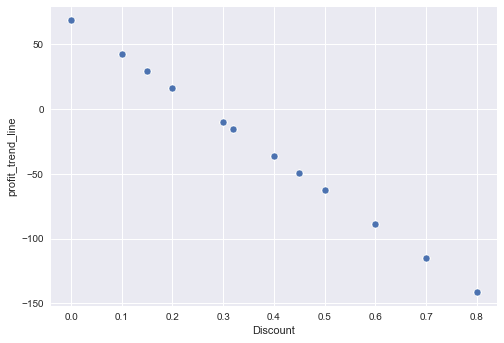

In [29]:
sns.scatterplot(data=trendline, x="Discount", y="profit_trend_line")
plt.show()

So, how is profit trend line monthly? Let's see this lineplot.

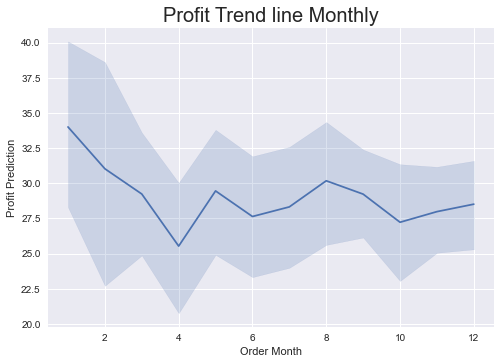

In [40]:
sns.lineplot(x = trendline["Order_Date"].dt.month, 
             y = trendline["profit_trend_line"]
            )
plt.title('Profit Trend line Monthly', size=20)
plt.xlabel('Order Month')
plt.ylabel('Profit Prediction')
plt.show()

<br>

<br>

<br>